In [61]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

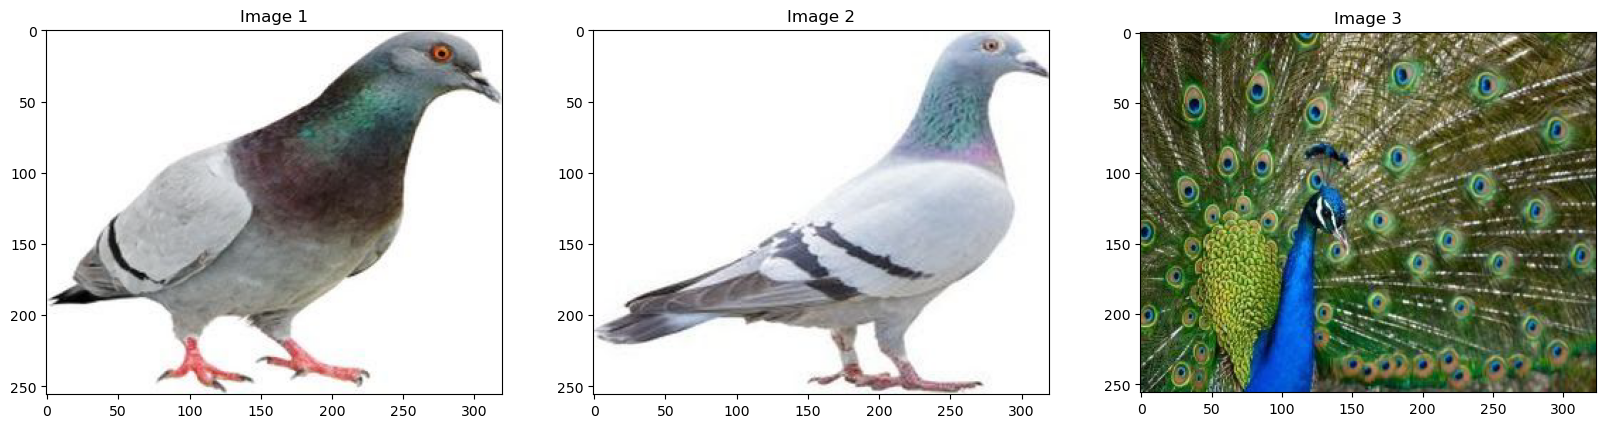

In [62]:
query_img = cv2.imread("queryimage.png")
ref_img1 = cv2.imread("refimage1.png")
ref_img2 = cv2.imread("refimage2.png")

images =  [query_img, ref_img1, ref_img2]

for i in range(len(images)):
    images[i] = cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB)

plt.figure(figsize=(20,5))
for i in range(len(images)):
    plt.subplot(1,3,i+1)
    plt.imshow(images[i])
    plt.title(f"Image {i+1}")
plt.show()

In [63]:
def normalized_hist(img):
    hist = cv2.calcHist([img], [0,1,2], None, [256, 256, 256], [0, 256, 0, 256, 0, 256])
    hist = cv2.normalize(hist, hist)
    hist = hist.flatten()
    return hist

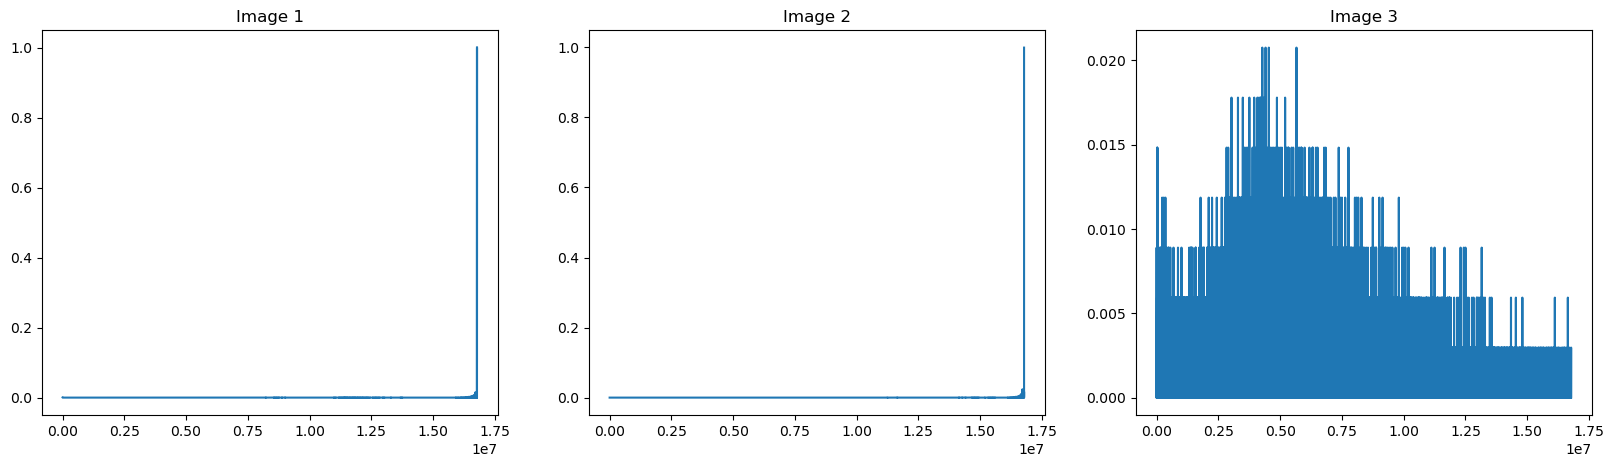

In [64]:
plt.figure(figsize=(20,5))
for i in range(len(images)):
    hist = normalized_hist(images[i])
    plt.subplot(1,3,i+1)
    plt.plot(hist)
    plt.title(f"Image {i+1}")
plt.show()

In [65]:
dists = []
for i in range(1, len(images)):
    dist = cv2.compareHist(normalized_hist(images[0]), normalized_hist(images[i]), cv2.HISTCMP_BHATTACHARYYA)
    dists.append(dist)

In [66]:
print(f"Distance between query image and reference image 1: {round(dists[0], 4)}")
print(f"Distance between query image and reference image 2: {round(dists[1], 4)}")

Distance between query image and reference image 1: 0.5953
Distance between query image and reference image 2: 0.9976
